<a href="https://colab.research.google.com/github/Kashish-x1/100-days-of-ML/blob/main/Day%2024%20-%20feature%20scaling%20-%20standarization/feature_scaling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
152,31,76000,0
168,29,148000,1
58,22,18000,0
118,40,59000,0
15,29,80000,0


# train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size = 0.3,random_state = 0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# standard scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train test ,it will learn the parameteres
scaler.fit(X_train)
# transform trainn and test sets
X_train_scaled = scaler.transform (X_train)
X_test_scaled = scaler.transform (X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [11]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# effect of scaling

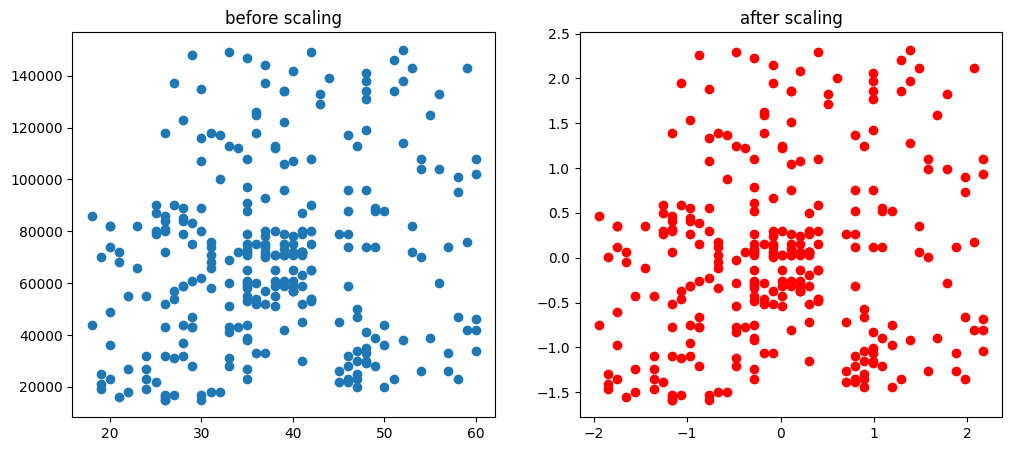

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize= (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title("after scaling")
plt.show()

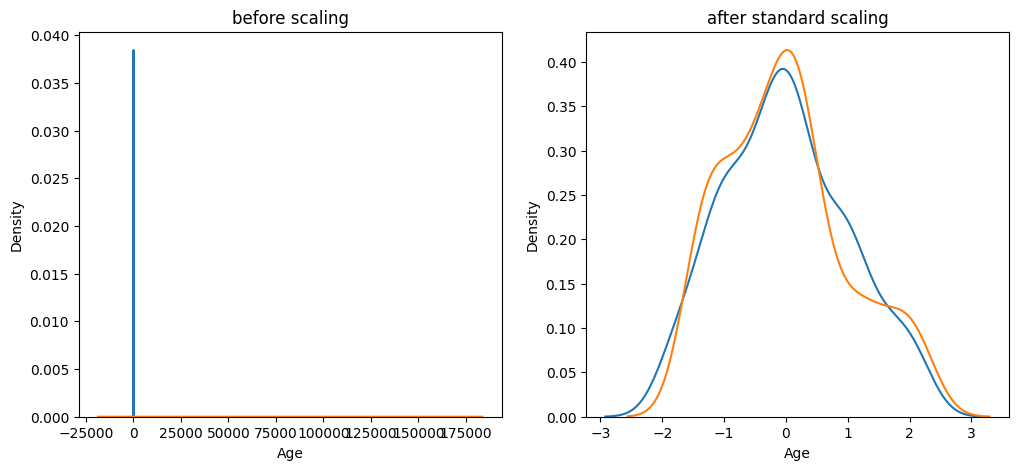

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols= 2,figsize=(12,5))
# before scaling
ax1.set_title('before scaling')
sns.kdeplot(X_train['Age'],ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax= ax1)
# after scaling
ax2.set_title('after standard scaling')
sns.kdeplot(X_train_scaled['Age'],ax= ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax= ax2)
plt.show()

# comparison of distributions

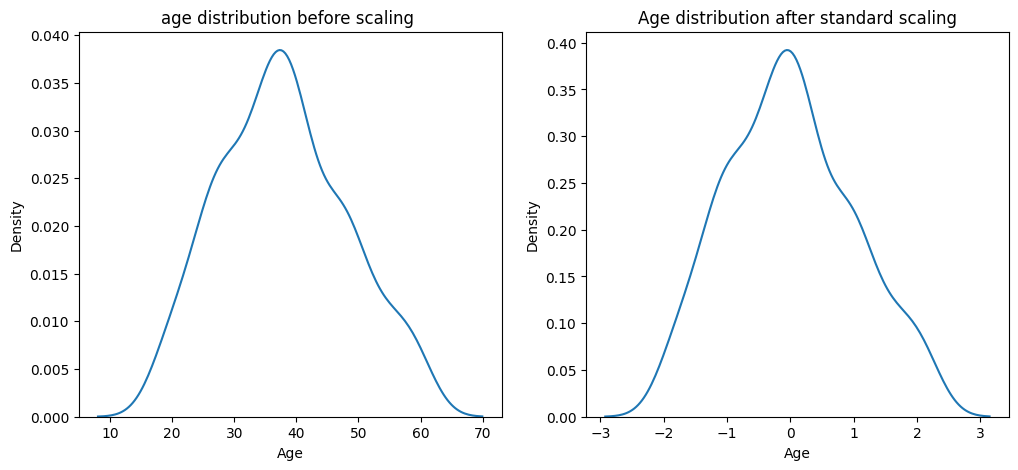

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
# before sacling
ax1.set_title('age distribution before scaling ')
sns.kdeplot(X_train['Age'],ax = ax1)
# after scaling
ax2.set_title('Age distribution after standard scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
plt.show()


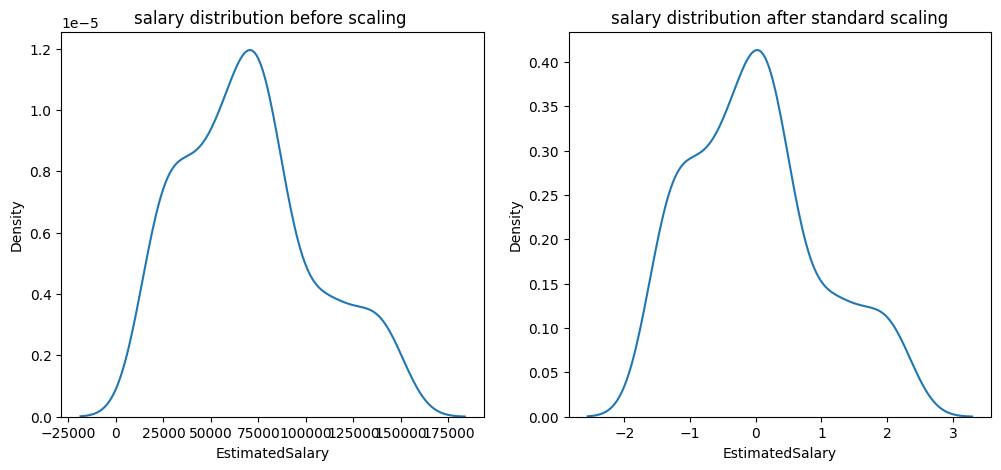

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
# before sacling
ax1.set_title('salary distribution before scaling ')
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)
# after scaling
ax2.set_title('salary distribution after standard scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

# why scaling is important

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [35]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.8666666666666667
scaled 0.875


In [36]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# effect of outlier

In [40]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)


In [41]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


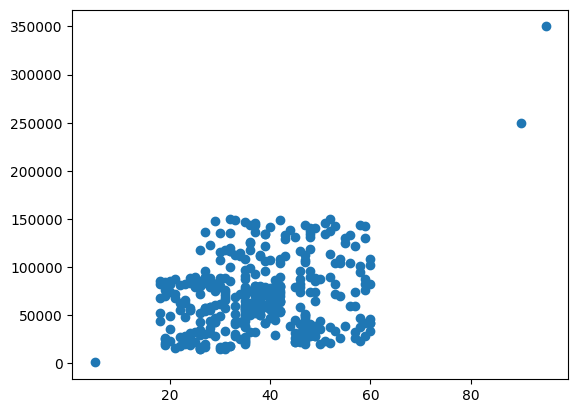

In [44]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size = 0.3,random_state = 0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train test ,it will learn the parameteres
scaler.fit(X_train)
# transform trainn and test sets
X_train_scaled = scaler.transform (X_train)
X_test_scaled = scaler.transform (X_test)

In [47]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

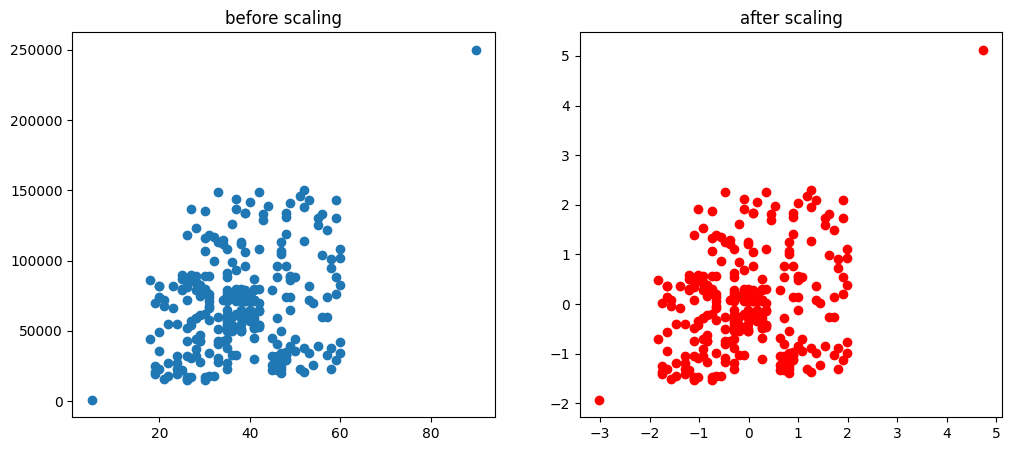

In [48]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize= (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title("after scaling")
plt.show()